# Problem Statement.

Choose a dataset where it has missing values and then preprocess the data.Next, Visualize the data from the dataset using matplotlib or seaborn by ploting the suitable graphs for the data.After visualization, make the inferences from the plots.Next, check the skewness and transform the data to the normal and make the testing hypothesis from it.

In [1]:
# importing all the libraries which are all needed 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy import stats

In [2]:
# Now let us read the dataset using pandas

df = pd.read_csv('tuassouth.csv')
df

,Unnamed: 0,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0,Tuas South,2014,1,1,0.0,0.0,0.0,0.0,27.1,29.9,25.1,6.0,22.3
1,1,Tuas South,2014,1,2,0.0,0.0,0.0,0.0,27.6,32.0,25.2,6.4,25.6
2,2,Tuas South,2014,1,3,57.6,30.6,42.2,52.0,26.4,31.2,23.3,6.0,72.4
3,3,Tuas South,2014,1,4,17.0,8.2,14.2,17.0,26.3,30.7,24.1,6.7,24.8
4,4,Tuas South,2014,1,5,0.6,0.4,0.6,0.6,25.5,27.1,23.9,6.6,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2552,Tuas South,2020,12,27,0.2,0.2,0.2,0.2,27.1,31.3,24.1,13.4,31.7
2553,2553,Tuas South,2020,12,28,9.4,5.0,6.4,6.6,27.4,32.3,25.5,14.3,46.9
2554,2554,Tuas South,2020,12,29,1.4,1.4,1.4,1.4,26.7,28.4,25.9,11.6,26.7
2555,2555,Tuas South,2020,12,30,0.2,0.2,0.2,0.2,27.5,30.5,25.8,13.0,35.0


The dataframe has 2557 rows and 14 columns, out of which 2 of them are not useful they are Unnamed:0 and station features.Now remove those two features.

# Data Preprocessing :

In [3]:
df = df.drop(['Unnamed: 0','Station'],axis=1)

In [4]:
# Let us see what are all data types are present in the dataframe.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           2557 non-null   int64  
 1   Month                          2557 non-null   int64  
 2   Day                            2557 non-null   int64  
 3   Daily Rainfall Total (mm)      2512 non-null   float64
 4   Highest 30 min Rainfall (mm)   2509 non-null   float64
 5   Highest 60 min Rainfall (mm)   2507 non-null   float64
 6   Highest 120 min Rainfall (mm)  2507 non-null   float64
 7   Mean Temperature (°C)          2436 non-null   float64
 8   Maximum Temperature (°C)       2478 non-null   float64
 9   Minimum Temperature (°C)       2478 non-null   float64
 10  Mean Wind Speed (km/h)         2497 non-null   float64
 11  Max Wind Speed (km/h)          2498 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 239.8 KB


3 features of them are int and others are float.

In [5]:
# Now let's check for the missing values in the dataset.

df.isnull().sum()

Year                               0
Month                              0
Day                                0
Daily Rainfall Total (mm)         45
Highest 30 min Rainfall (mm)      48
Highest 60 min Rainfall (mm)      50
Highest 120 min Rainfall (mm)     50
Mean Temperature (°C)            121
Maximum Temperature (°C)          79
Minimum Temperature (°C)          79
Mean Wind Speed (km/h)            60
Max Wind Speed (km/h)             59
dtype: int64

We can see that there are
1) 45 missing values in Daily Rainfall Total (mm) 
2) 48 missing values in Highest 30 min Rainfall (mm)
3) 50 missing values in Highest 60 min Rainfall (mm)
4) 50 missing values in Highest 120 min Rainfall (mm)
5) 121 missing vaues in Mean Temperature (°C) 
6) 79 missing values in Maximum Temperature (°C)
7) 79 missing values in Minimum Temperature (°C)
8) 60 missing values in Mean Wind Speed (km/h) 
9) 59 missing values in Max Wind Speed (km/h)

Let us fill all the values using mean of their features.

In [6]:
# filling missing values with mean.

columns_with_null = df.columns[df.isnull().any()].tolist()
for cols in columns_with_null:
    mean = df[cols].mean()
    df[cols] = df[cols].fillna(mean)

In [7]:
# Now let's again check for missing values

df.isnull().sum()

Year                             0
Month                            0
Day                              0
Daily Rainfall Total (mm)        0
Highest 30 min Rainfall (mm)     0
Highest 60 min Rainfall (mm)     0
Highest 120 min Rainfall (mm)    0
Mean Temperature (°C)            0
Maximum Temperature (°C)         0
Minimum Temperature (°C)         0
Mean Wind Speed (km/h)           0
Max Wind Speed (km/h)            0
dtype: int64

We can see that there are no missing values in any feature.

In [8]:
df

,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,2014,1,1,0.0,0.0,0.0,0.0,27.1,29.9,25.1,6.0,22.3
1,2014,1,2,0.0,0.0,0.0,0.0,27.6,32.0,25.2,6.4,25.6
2,2014,1,3,57.6,30.6,42.2,52.0,26.4,31.2,23.3,6.0,72.4
3,2014,1,4,17.0,8.2,14.2,17.0,26.3,30.7,24.1,6.7,24.8
4,2014,1,5,0.6,0.4,0.6,0.6,25.5,27.1,23.9,6.6,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2020,12,27,0.2,0.2,0.2,0.2,27.1,31.3,24.1,13.4,31.7
2553,2020,12,28,9.4,5.0,6.4,6.6,27.4,32.3,25.5,14.3,46.9
2554,2020,12,29,1.4,1.4,1.4,1.4,26.7,28.4,25.9,11.6,26.7
2555,2020,12,30,0.2,0.2,0.2,0.2,27.5,30.5,25.8,13.0,35.0


Now let us combine Year, Month, and Day features of the datadet and create a new dataset with feature Date, and replace the index with Date. Now we can also plot the time series plot for the above datast and make the inferences from them.

# Visualization :

In [9]:
# We create a new column "Date" using year,month,day columns from our df and setting index as df

df['Date'] = pd.to_datetime(df[['Year','Month','Day']])     
df.set_index('Date',inplace=True)

In [10]:
df

,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
Date,,,,,,,,,,,,
2014-01-01,2014,1,1,0.0,0.0,0.0,0.0,27.1,29.9,25.1,6.0,22.3
2014-01-02,2014,1,2,0.0,0.0,0.0,0.0,27.6,32.0,25.2,6.4,25.6
2014-01-03,2014,1,3,57.6,30.6,42.2,52.0,26.4,31.2,23.3,6.0,72.4
2014-01-04,2014,1,4,17.0,8.2,14.2,17.0,26.3,30.7,24.1,6.7,24.8
2014-01-05,2014,1,5,0.6,0.4,0.6,0.6,25.5,27.1,23.9,6.6,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,2020,12,27,0.2,0.2,0.2,0.2,27.1,31.3,24.1,13.4,31.7
2020-12-28,2020,12,28,9.4,5.0,6.4,6.6,27.4,32.3,25.5,14.3,46.9
2020-12-29,2020,12,29,1.4,1.4,1.4,1.4,26.7,28.4,25.9,11.6,26.7


Now let us plot the Time Series Plot for each of the features present in the dataset.

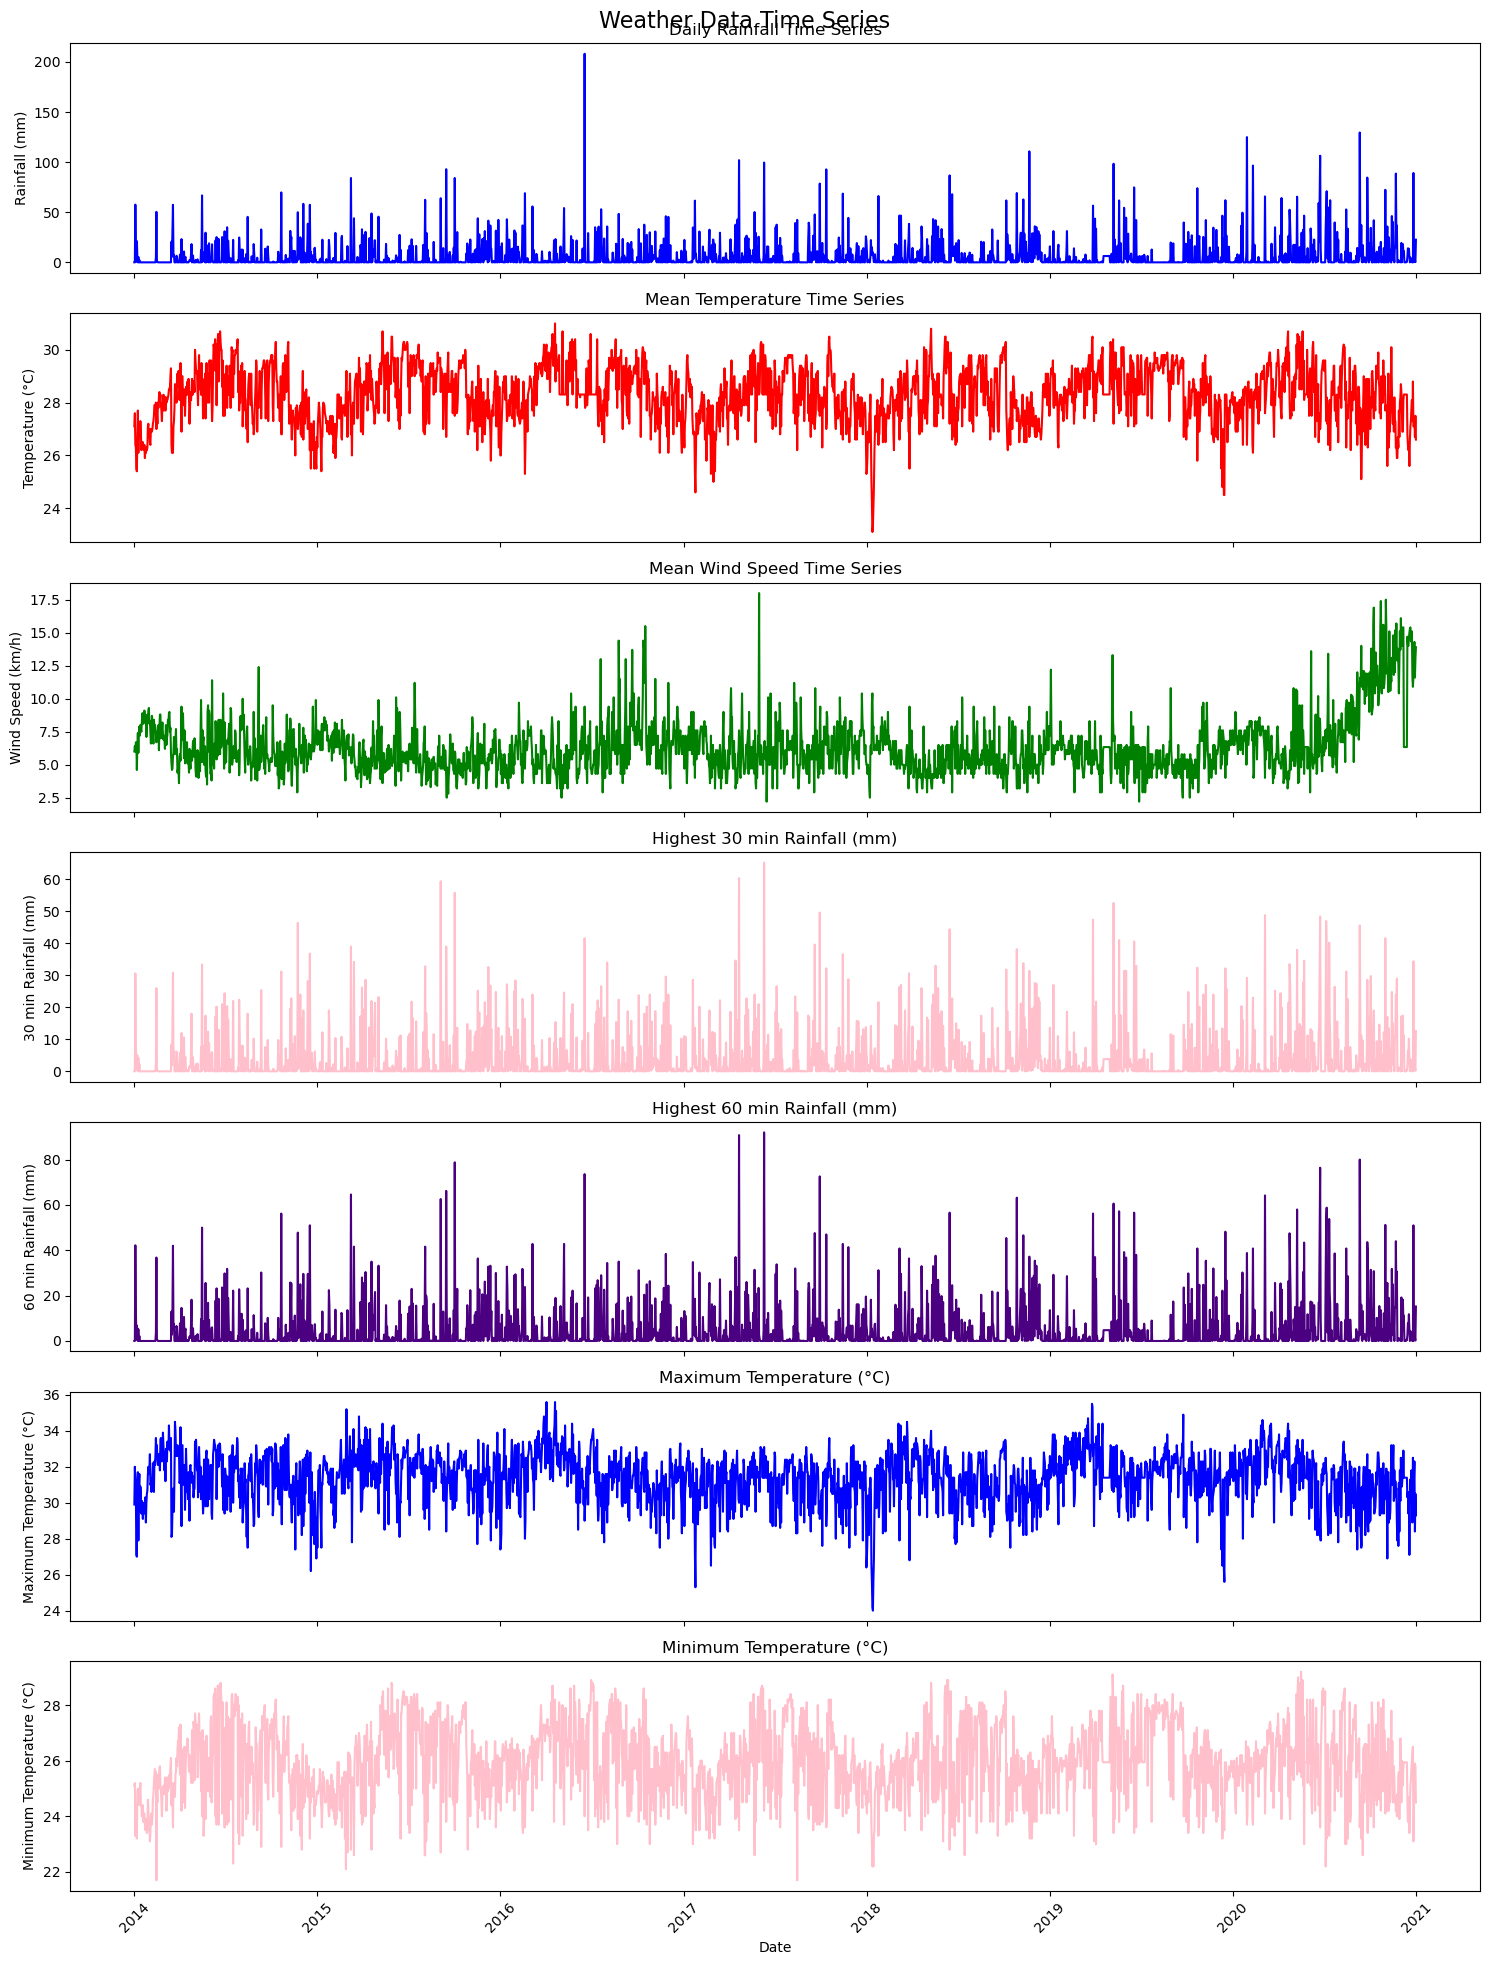

In [11]:
fig,axes = plt.subplots(nrows=7,ncols=1,figsize=(15,20),sharex=True)     # Createing subplots for each variable.

axes[0].plot(df.index, df['Daily Rainfall Total (mm)'], color='blue')   # Ploting Daily Rainfall with Time Series.
axes[0].set_ylabel('Rainfall (mm)')
axes[0].set_title('Daily Rainfall Time Series')

axes[1].plot(df.index, df['Mean Temperature (°C)'], color='red')        # Ploting Mean Temperature with Time Series.
axes[1].set_ylabel('Temperature (°C)')
axes[1].set_title('Mean Temperature Time Series')

axes[2].plot(df.index, df['Mean Wind Speed (km/h)'], color='green')     # Ploting Mean wind Speed with Time Series.
axes[2].set_ylabel('Wind Speed (km/h)')
axes[2].set_title('Mean Wind Speed Time Series')

axes[3].plot(df.index, df['Highest 30 min Rainfall (mm)'], color='pink')# Ploting Highest 30 min Rainfall(mm) with Time Series.
axes[3].set_ylabel('30 min Rainfall (mm)')
axes[3].set_title('Highest 30 min Rainfall (mm)')

axes[4].plot(df.index, df['Highest 60 min Rainfall (mm)'], color='indigo')# Ploting Highest 60 min Rainfall(mm) with Time Series.
axes[4].set_ylabel('60 min Rainfall (mm)')
axes[4].set_title('Highest 60 min Rainfall (mm)')

axes[5].plot(df.index, df['Maximum Temperature (°C)'], color='blue')    # Ploting Maximum Temperature (°C) with Time Series.
axes[5].set_ylabel('Maximum Temperature (°C)')
axes[5].set_title('Maximum Temperature (°C)')

axes[6].plot(df.index, df['Minimum Temperature (°C)'], color='pink')    # Ploting Maximum Temperature (°C) with Time Series.
axes[6].set_ylabel('Minimum Temperature (°C)')
axes[6].set_title('Minimum Temperature (°C)')

plt.xlabel('Date')                                                      # Setting the X-label as Date.
plt.xticks(rotation=45)
plt.suptitle('Weather Data Time Series', fontsize=16)                   # Adding a title for the plot.
plt.tight_layout()
plt.show()

# Inferences from the above plots :

1) Daily Rainfall : 
    We can see that the rainfall across the years 2014,2015 the highest rainfall was around 100 mm and on the other days it was
    around 25(mm) to 75(mm) of rainfall.In 2016 we can also see that like in June or July month the highest rainfall was there
    and that is 200(mm) of rainfall, and in other days of 2016 year it was normal like around 60.Following years from 2018 to
    2021 the rainfall in (mm) got increased. It was around 110(mm) to 140(mm) of rainfall.

2) Mean Temperature :
    In the inial years of the 2014 the average temperature was from 25 to 27.8 degrees celsius.BUt later on the average temper-
    ature was 31 degrees celsius.The same followed for the  years 2015,2016, and 2017. But the starting year of the 2018 the
    temperatiure was around less than 24 degrees celcius.Later, the temperature increased to 31 degrees.And we can see that the 
    the avreage temperatiure in the city of Tuas South is around 31-32 degrees celsius.

3) Mean wind speed :
    The average wind speed in the year 2014-2015 was around 12.5(km/h).In the year 2015-2016 it decreased to the 11.5(km/h).We
    can see that the wind sepped increased in the year 2016 to 15(km/h), and in the year 2017 it still increased to 18 (km/h) 
    and we can see that the wind speed decreased completely to the 10 (km/h) in the year 2018.and we can see that the wind
    speed is 12.5 (km/h) in  the years 2019 and 2020.Later in the year 2021, it increased to 16.5 (km/h).
    
4) 30 Min Rainfall :
    In the ending of the year 2014 the 30 min rainfall was there and it's speed was around 45(mm) of rainfall.Similarly it fol-
    lowed the year 2015 where the rainfall was at the end of the year and the rainfall speed was around 55(mm).In 2016 the 
    30 min rain fall was also there but the highest was around the mid of the year and it was around 42(mm).In many months of
    the year 2017 the rainfall was there and the highest was around 45(mm) to 65(mm).And in the year 2018,2019,and 2020 the 30
    min rain fall was high in the mid of their years and it was around 45(mm).
   
5) 60 Min rainfall :
    In the ending of the year 2014 the 60 min rainfall was there and it's speed was around 65(mm) of rainfall.Similarly it fol-
    lowed the year 2015 where the rainfall was at the end of the year and the rainfall speed was around 75(mm).In 2016 the 
    60 min rain fall was also there but the highest was around the mid of the year and it was around 75(mm).In many months of
    the year 2017 the rainfall was there and the highest was around 75(mm) to 90(mm).And in the year 2018,2019 the 60 min rain     fall was high in the mid of their years and it was around 60(mm).And in the year 2020, it was around the mid of the year 
    with the 65(mm) - (75mm) of rainfall.
    
6) Maximum Temperature :
     The maximum temperature in the 2014 was around 34 degrees celsius, and in the later months of that year the temperature
     was around 25 to 32 degree celsius.In the year 2015 the highest temperature was around 35 degree celsius.The maximum 
     temperature in the year 2016 was 35 degree celsius.Later we can observe that average temperature in the year 2017 and 2018 
     was around the 32 to 34 degree celsius.The highest tempearature in the year 2019 was 35 degree celsius.And in the year 
     2020 the temperature was around 33 degree celsius. By this we can observe that the minimum temperature in the city
     Tuas South is 24 degrees and highest is 35 degrees.
    
7) Minimum Temperature :
    We can clearly observe that the minimum temperature across the years in the city Tuas South is 22 degrees and highest among
    all of them it can go is around 29 degrees.

# Now let us check the normality in the dataset using the boxplots.


In [12]:
# let us plot the box plots for all the features in the dataframe.

def plot_boxplots(df):
    numerical_cols = df.select_dtypes(include=['number'])
    num_rows, num_cols = 4, 3
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 12))
    axes = axes.flatten()
    for i, col in enumerate(numerical_cols.columns):
        ax = axes[i]
        ax.boxplot(df[col], vert=False)
        ax.set_title(f'Box Plot of {col}')
        ax.set_xlabel(col)
    for i in range(len(numerical_cols.columns), num_rows * num_cols):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.show()

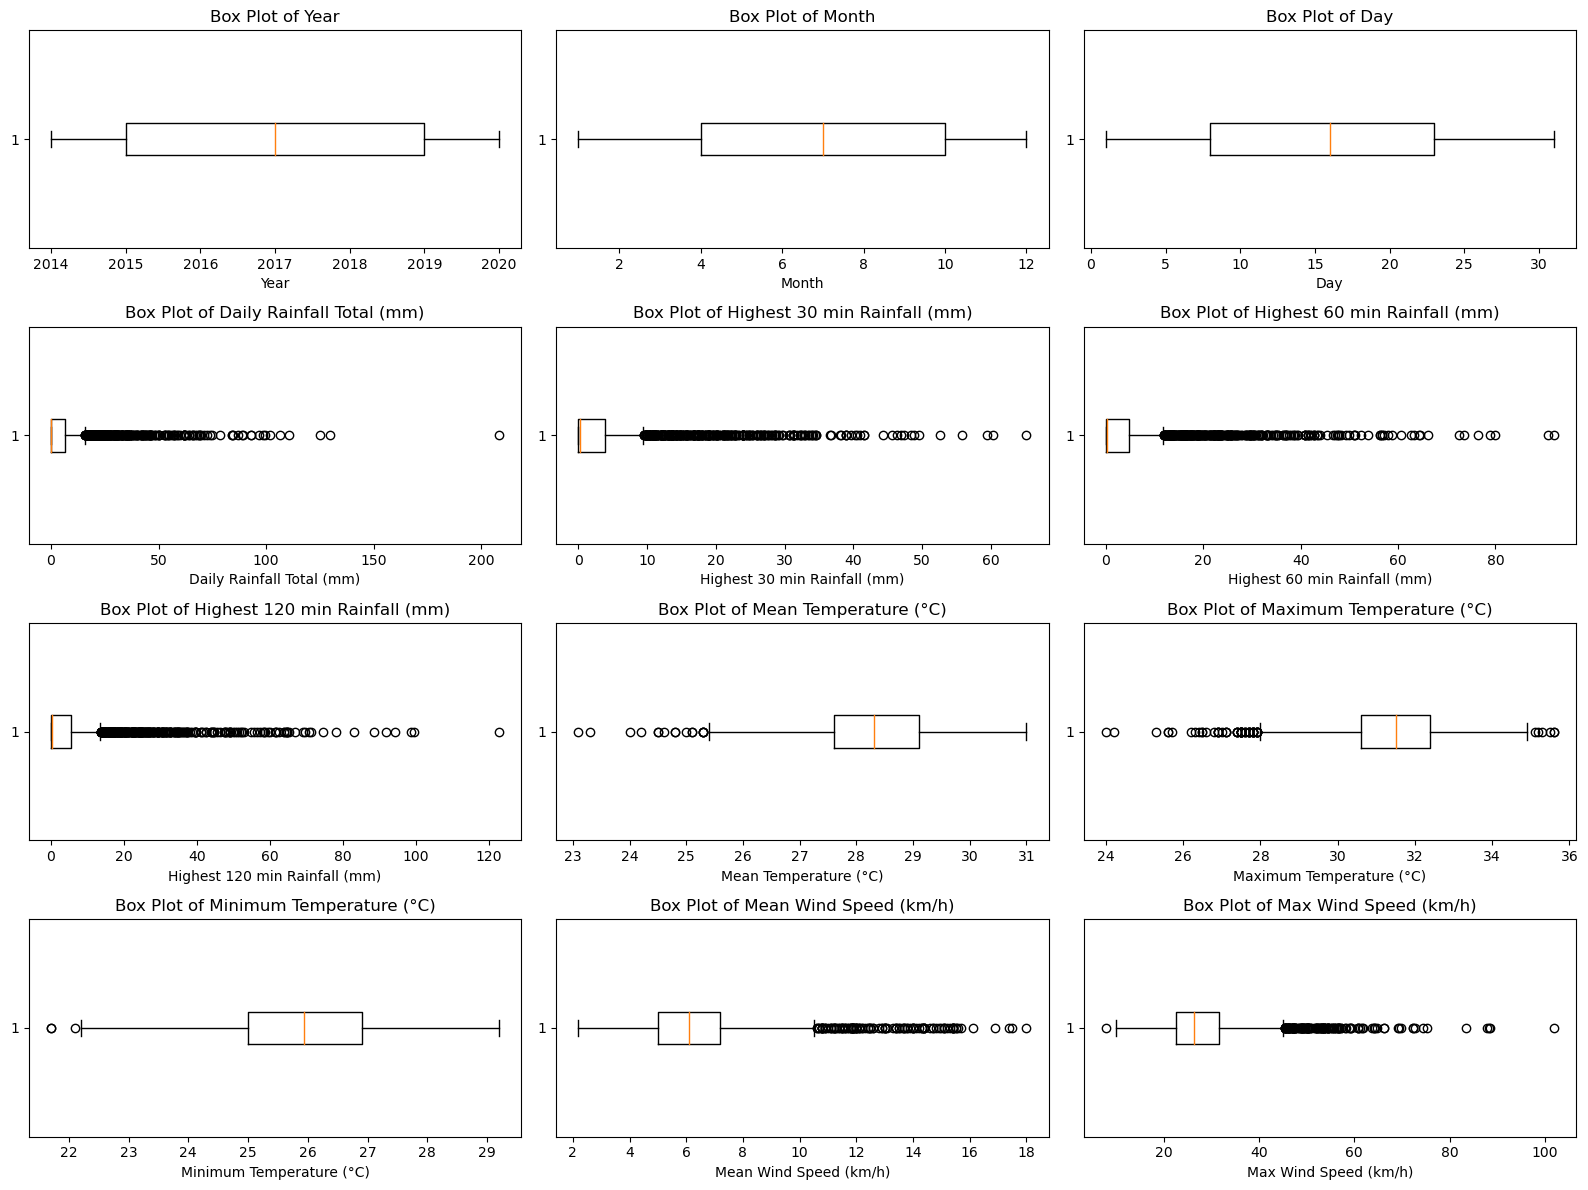

In [13]:
plot_boxplots(df)

Now let us mention skewness of the data from the above boxplots for each of the columns except year,Month and Day.

1) Daily Rainfall Total(mm) - We can see that the data is completely right-skewed and the data is not normal and we have 
   outliers.
2) Highest 30 min rainfall(mm) - we can see that the data is right-skewed and the data is not normal with many outliers.
3) Highest 60 min rainfall(mm) - we can see that the data is right-skewed and the data is not normal with many outliers.
4) Highest 120 min rainfall(mm) - we can see that the data is right-skewed and the data is not normal with many outliers.
5) Mean Temperature - We can see that the data is slightly left-skewed and the data is not normal with some outliers.
6) Maximum Temperature - We can see that the data seems to be normal and we have some outliers in the data.
7) Minimum Temperature - we can see that the data is seems to be normal and having some left-skewness with some datapoints as
   outliers.
8) Mean wind Speed - We can see that the data is right-skewed and the data is not normal with many outliers.
9) Max wind Speed - We can see that the data is right-skewed and the data is not normal with many outliers.

In [14]:
# let us check the skew-ness of the datapoints 

df.skew(axis=0)

Year                             0.000098
Month                           -0.009133
Day                              0.006654
Daily Rainfall Total (mm)        4.373965
Highest 30 min Rainfall (mm)     3.063547
Highest 60 min Rainfall (mm)     3.474454
Highest 120 min Rainfall (mm)    3.693193
Mean Temperature (°C)           -0.374309
Maximum Temperature (°C)        -0.689426
Minimum Temperature (°C)        -0.076609
Mean Wind Speed (km/h)           1.688047
Max Wind Speed (km/h)            2.011408
dtype: float64

In [15]:
def Check_skew(df,feature):
    fig,axes = plt.subplots(1,3,figsize=(15,4))
    sns.boxplot(ax=axes[0],data=df,y=feature)
    axes[0].set_title(f"{feature} BoxPlot")
    sns.histplot(ax=axes[1],data=df,x=feature,kde=True,color='red',label=round(df[feature].skew(),3))
    axes[1].set_title(f"{feature} HistPlot")
    scipy.stats.probplot(df[feature], sparams=(), dist='norm', fit=True, plot=axes[2], rvalue=False)
    axes[2].set_title(f"{feature} Probabiltity Plot")
    axes[1].legend()
    plt.show()

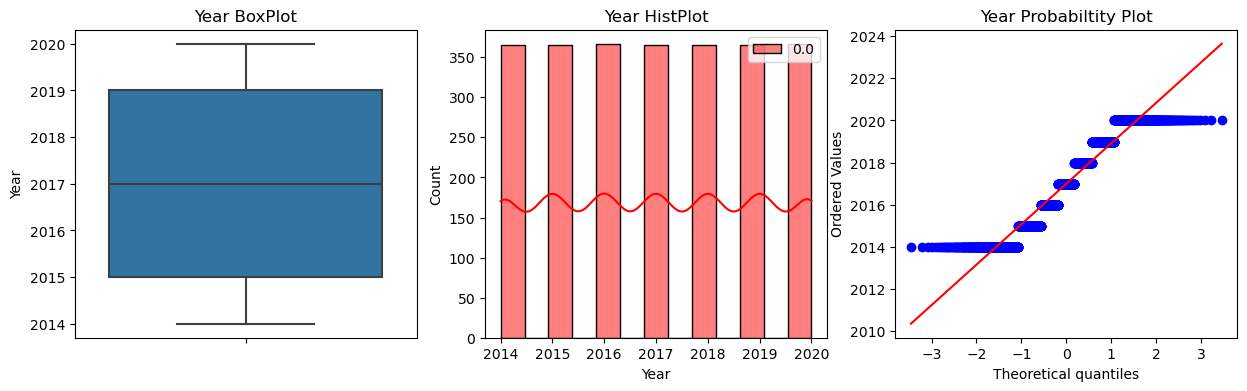

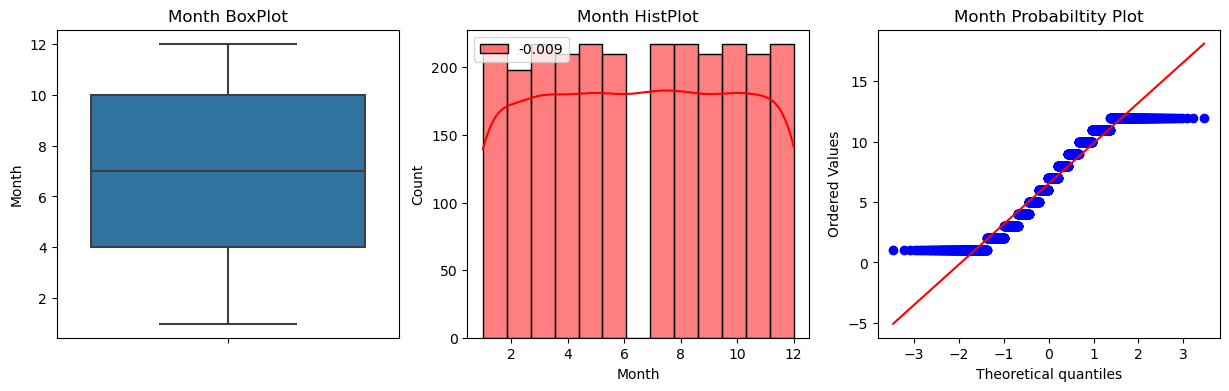

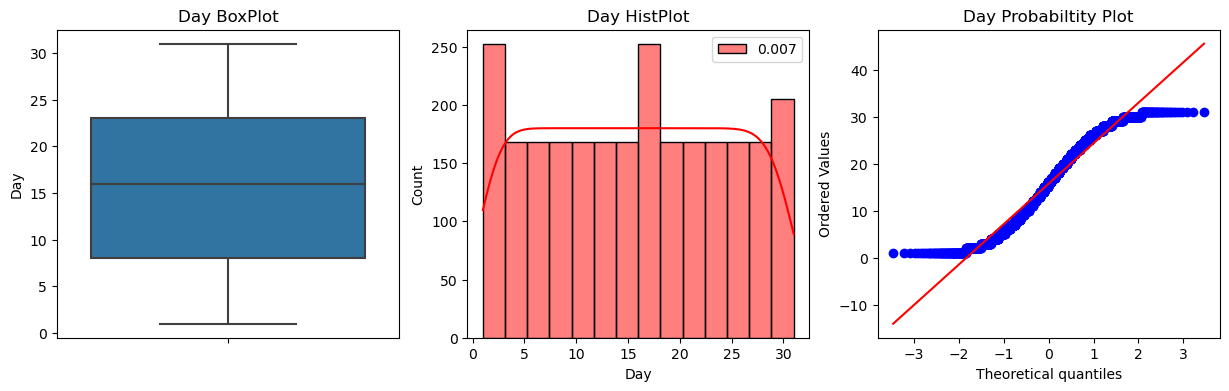

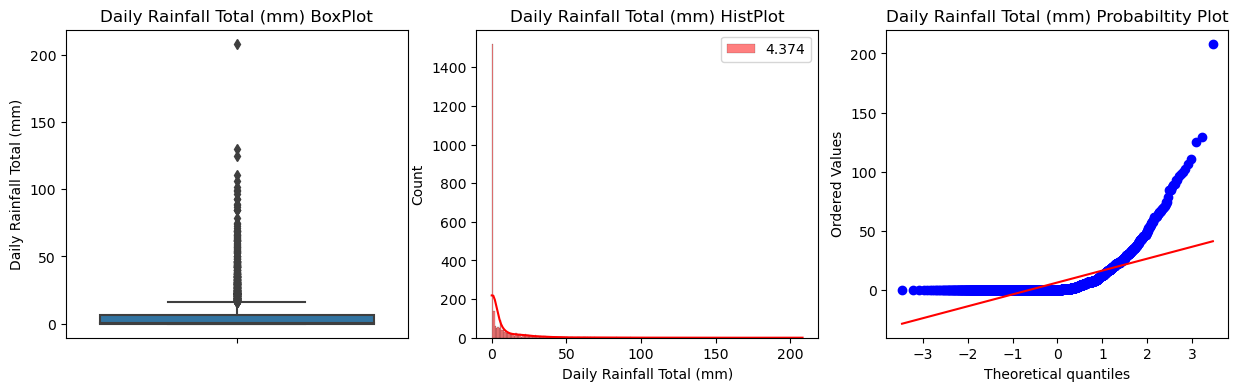

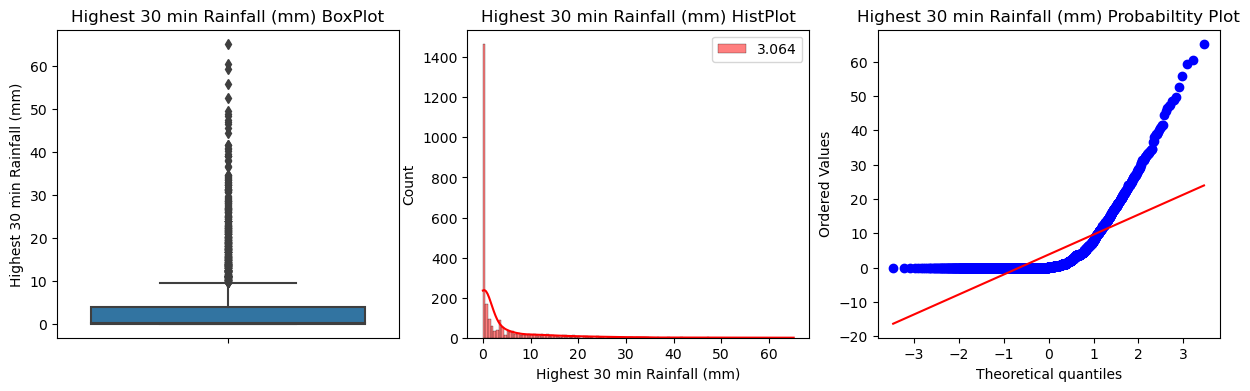

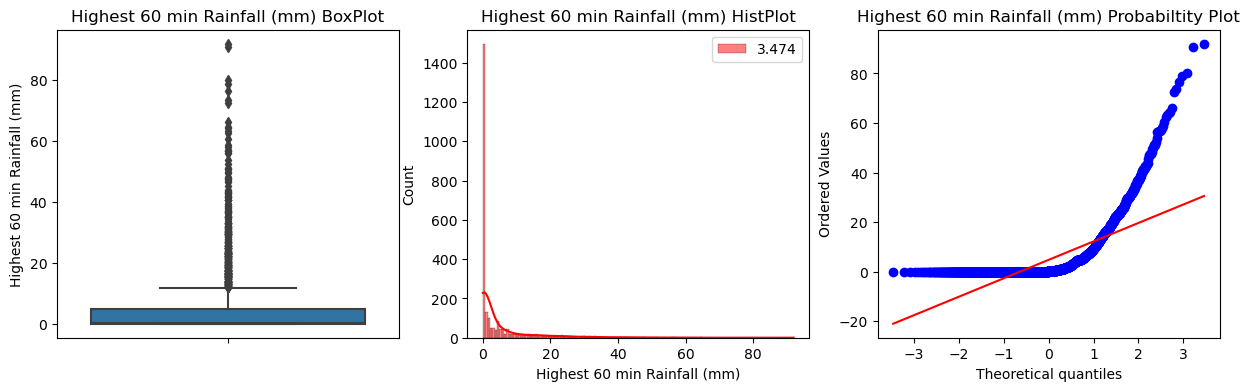

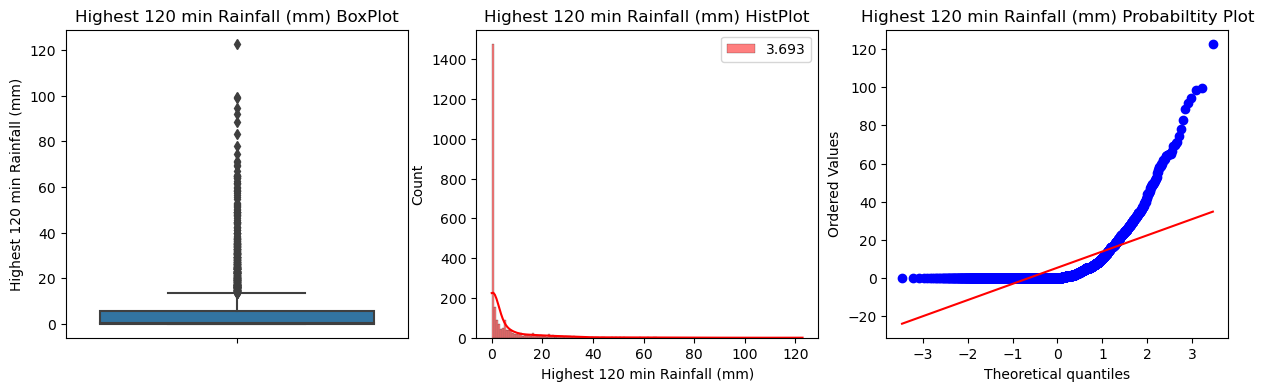

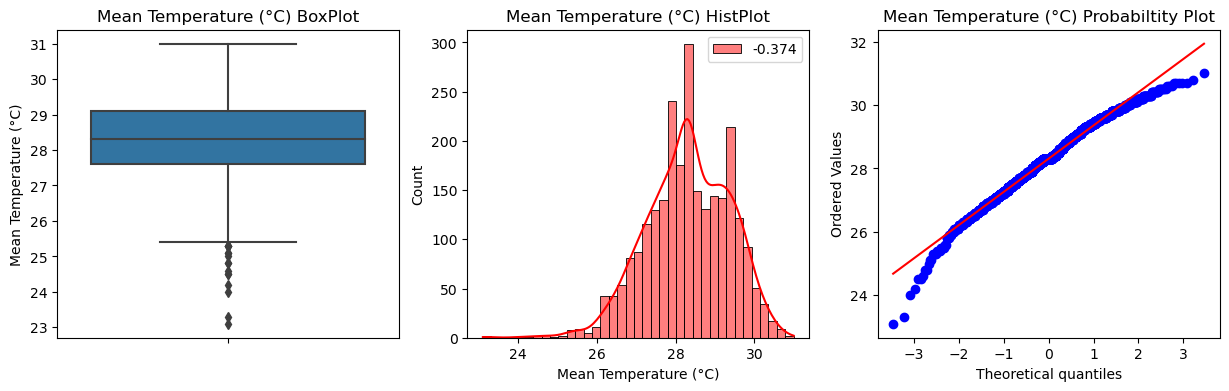

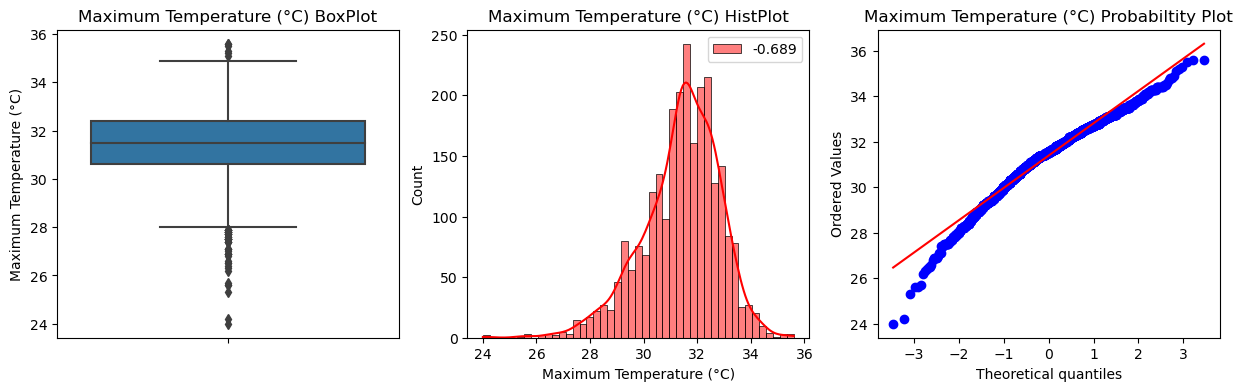

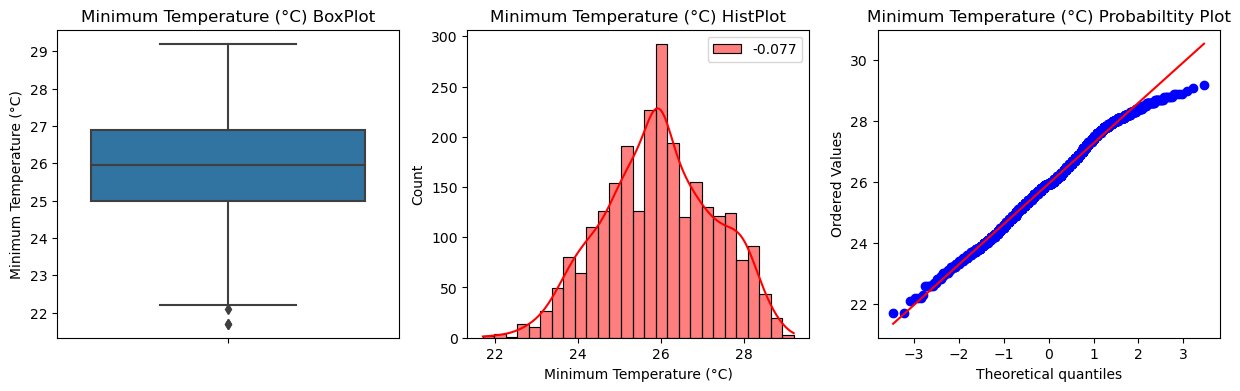

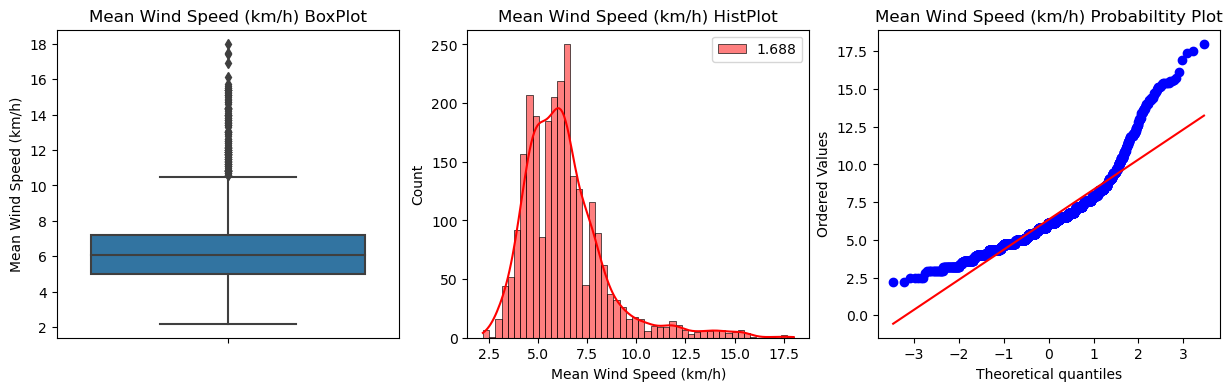

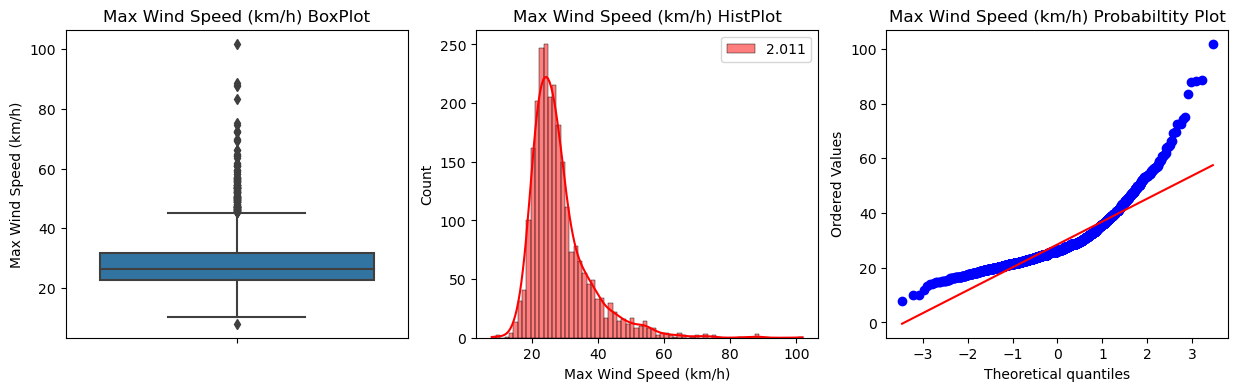

In [16]:
for cols in df:
    if cols != 'class':
        Check_skew(df,cols)

# Now by using Boxcox we transform the data to normal.

In [17]:
for col in df.columns:
    if col != 'Date':
        # Add a small constant to handle non-positive values
        df[col] = df[col] + 1e-5  # we can adjust the constant as needed
        df[col], lam = stats.boxcox(df[col])

# The transformation has been applied to all columns except 'Date'

In [54]:
lam

-0.6996144902782616

In [18]:
# now let us check the skewness after transformation.

df.skew(axis=0)

Year                            -0.000275
Month                           -0.219643
Day                             -0.246266
Daily Rainfall Total (mm)        0.053139
Highest 30 min Rainfall (mm)     0.045824
Highest 60 min Rainfall (mm)     0.046159
Highest 120 min Rainfall (mm)    0.046928
Mean Temperature (°C)           -0.010400
Maximum Temperature (°C)         0.011201
Minimum Temperature (°C)        -0.012676
Mean Wind Speed (km/h)          -0.020799
Max Wind Speed (km/h)           -0.067158
dtype: float64

We can see there is a change in the skewness of the datapoints after transformation.

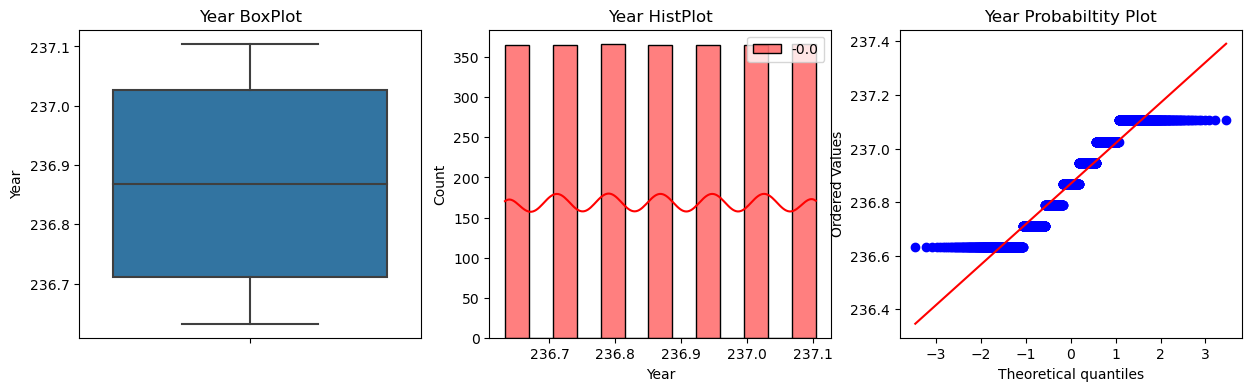

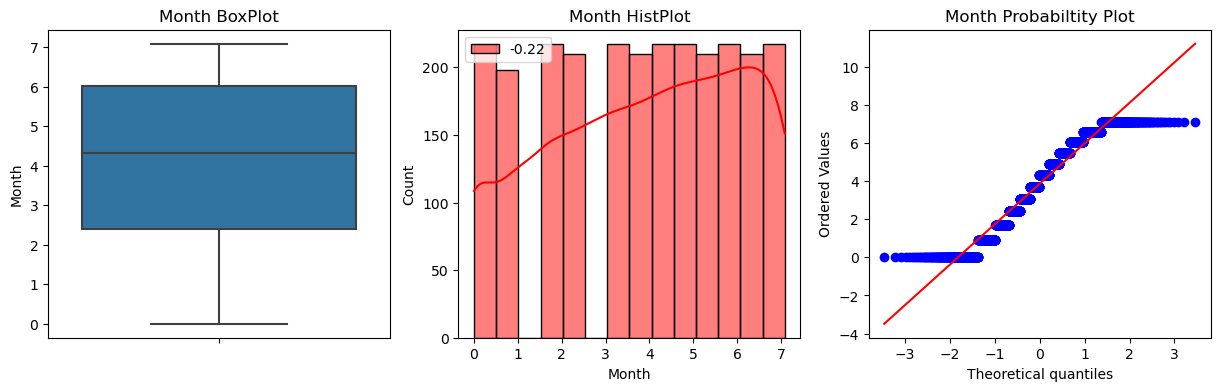

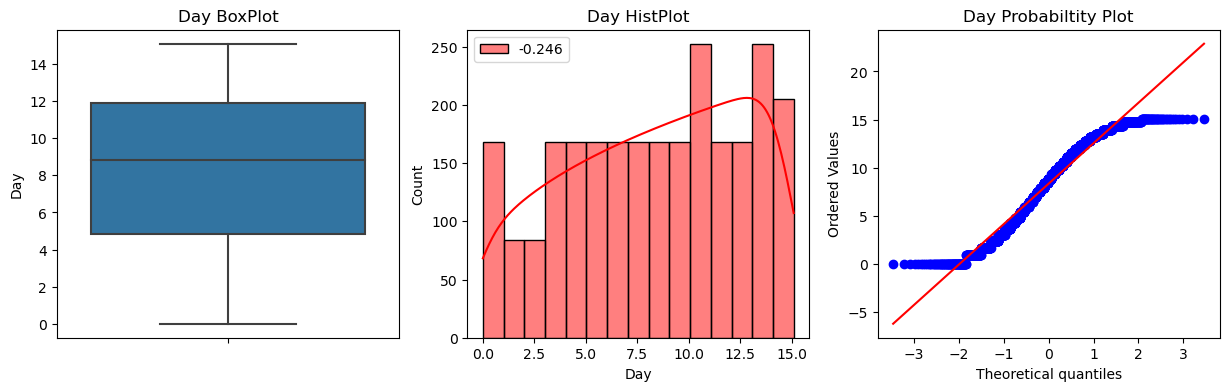

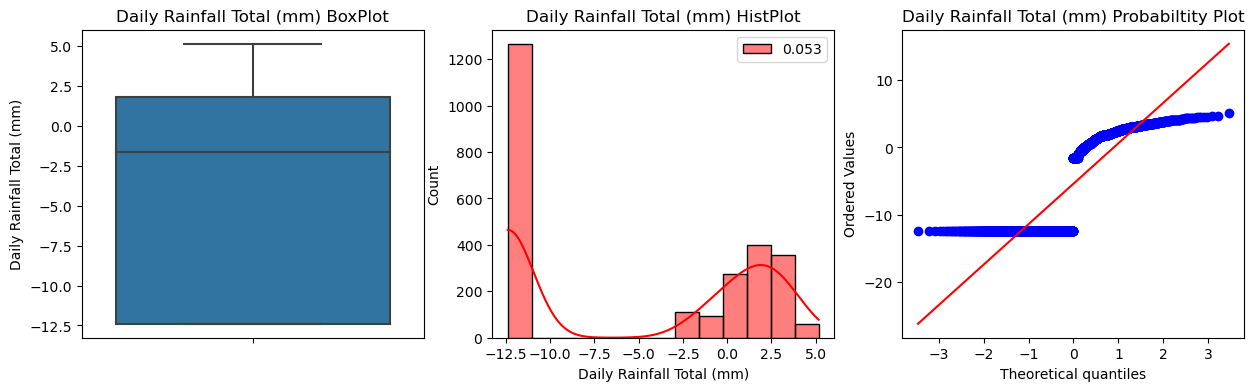

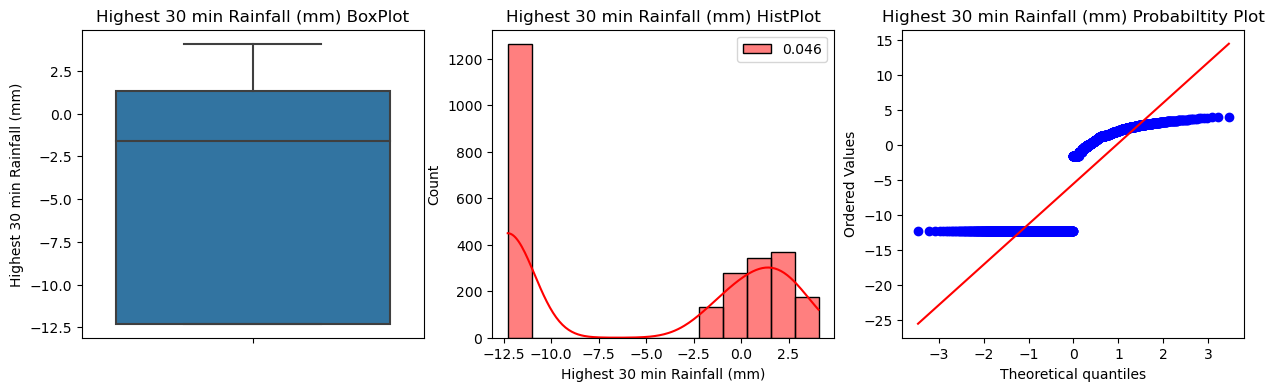

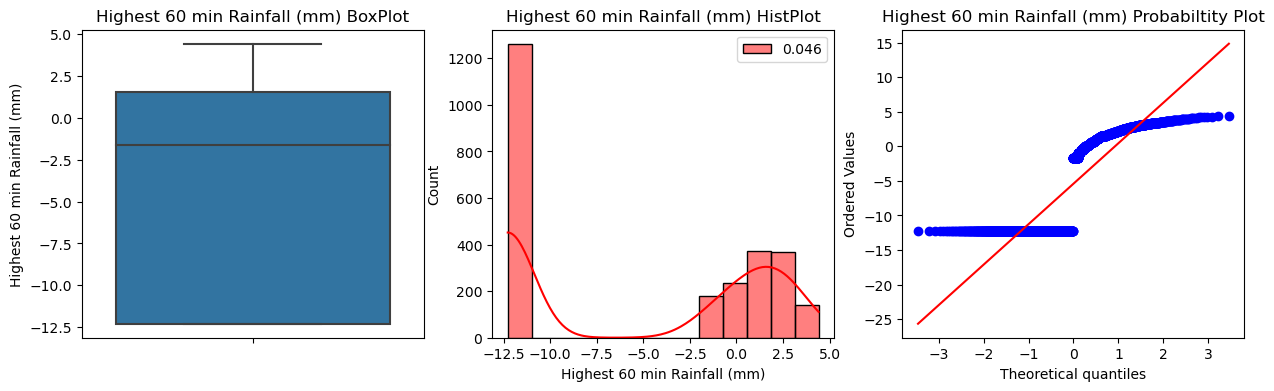

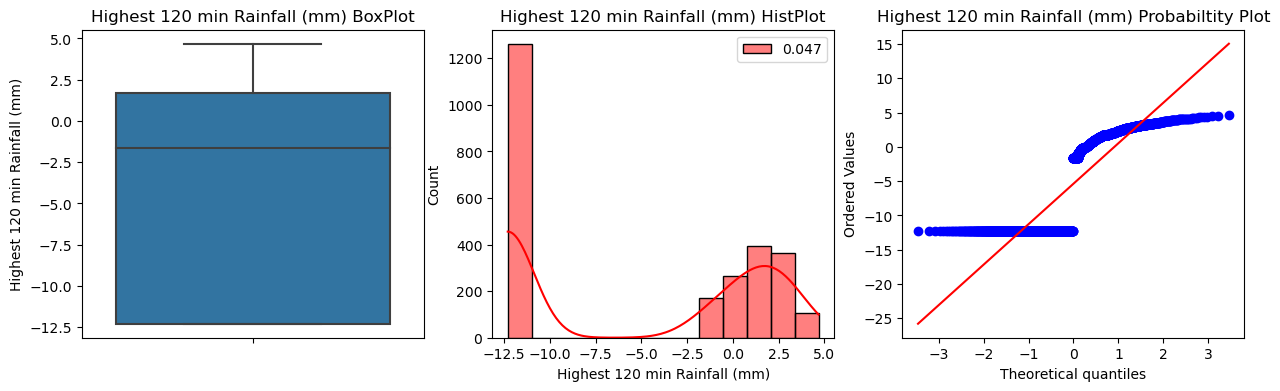

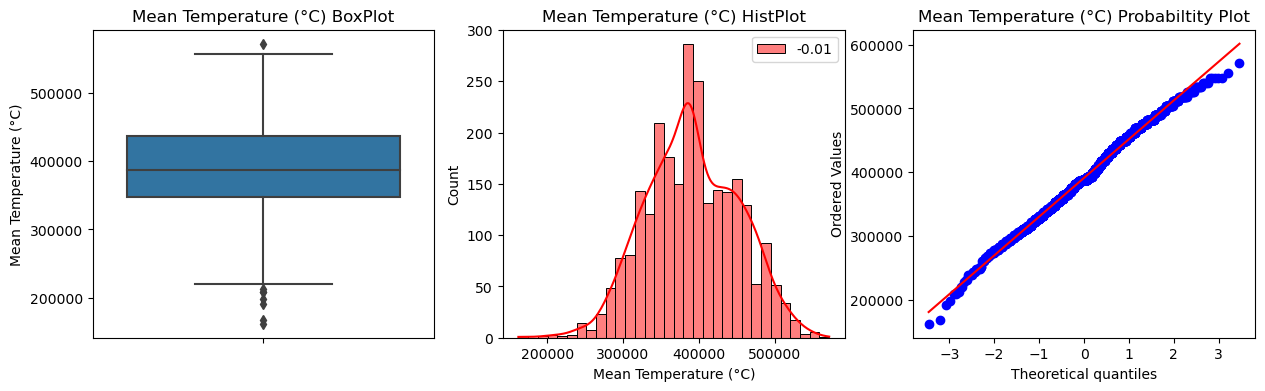

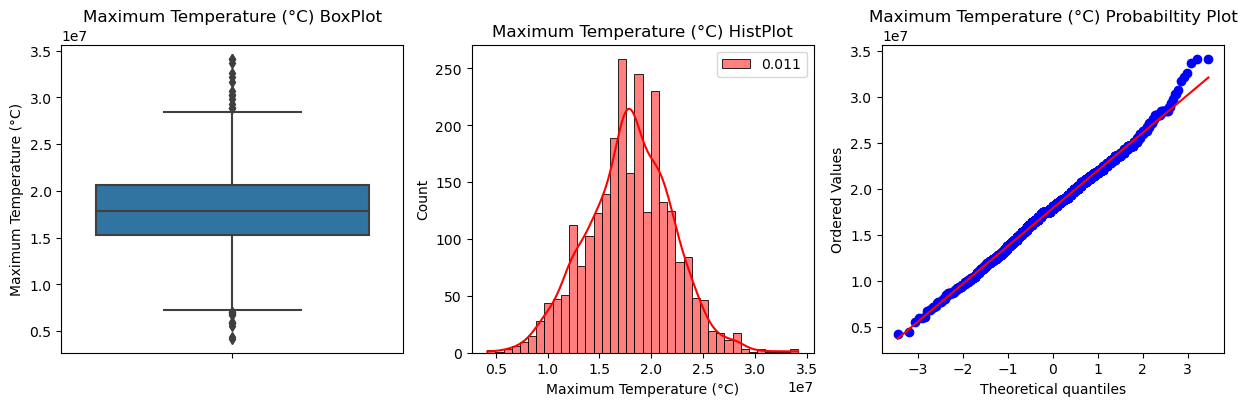

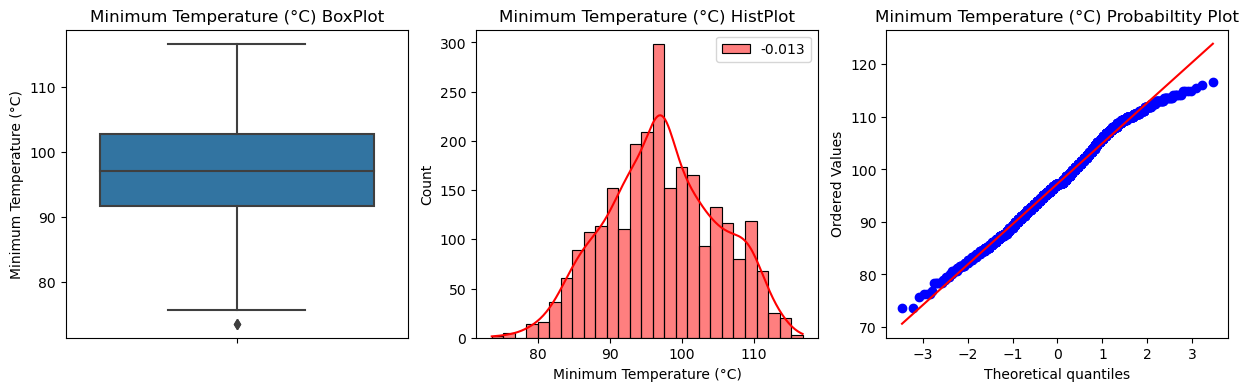

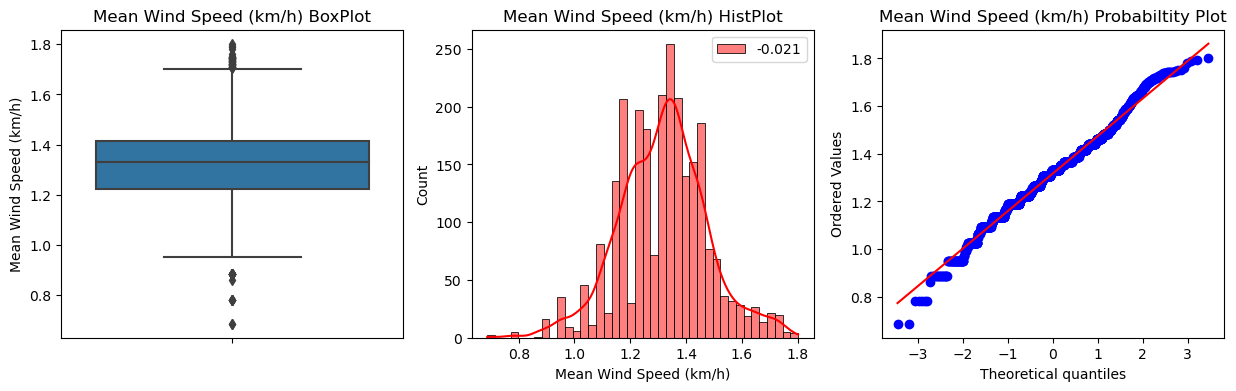

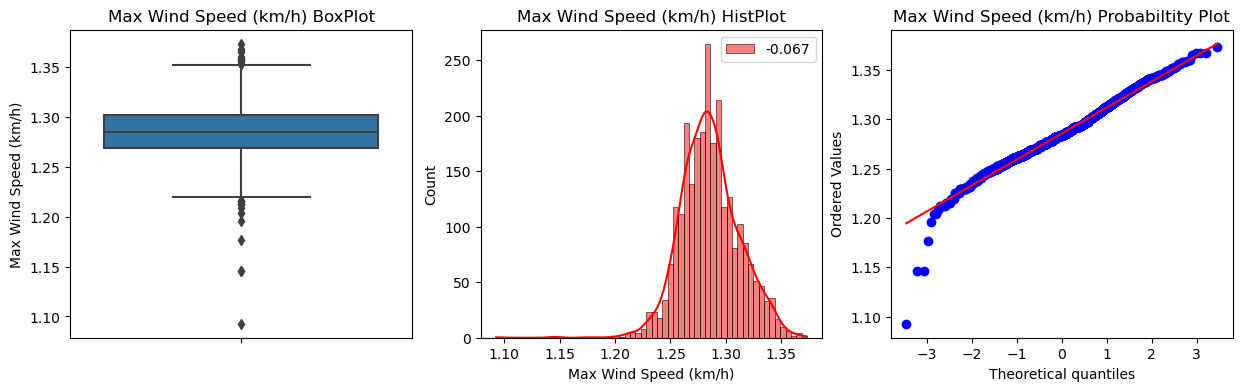

In [19]:
# ploting after the change in skewness.

for cols in df:
    if cols != 'class':
        Check_skew(df,cols)

# Testing Hypothesis

Let us choose 2 features Daily Rainfall,and Maximum Temperature from testing hypothesis.

Now let us again read the dataset and perform the testing hypothesis.

In [20]:
new_df = pd.read_csv('tuassouth.csv')

In [21]:
new_df

,Unnamed: 0,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0,Tuas South,2014,1,1,0.0,0.0,0.0,0.0,27.1,29.9,25.1,6.0,22.3
1,1,Tuas South,2014,1,2,0.0,0.0,0.0,0.0,27.6,32.0,25.2,6.4,25.6
2,2,Tuas South,2014,1,3,57.6,30.6,42.2,52.0,26.4,31.2,23.3,6.0,72.4
3,3,Tuas South,2014,1,4,17.0,8.2,14.2,17.0,26.3,30.7,24.1,6.7,24.8
4,4,Tuas South,2014,1,5,0.6,0.4,0.6,0.6,25.5,27.1,23.9,6.6,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2552,Tuas South,2020,12,27,0.2,0.2,0.2,0.2,27.1,31.3,24.1,13.4,31.7
2553,2553,Tuas South,2020,12,28,9.4,5.0,6.4,6.6,27.4,32.3,25.5,14.3,46.9
2554,2554,Tuas South,2020,12,29,1.4,1.4,1.4,1.4,26.7,28.4,25.9,11.6,26.7
2555,2555,Tuas South,2020,12,30,0.2,0.2,0.2,0.2,27.5,30.5,25.8,13.0,35.0


In [22]:
# Let us find the mean of the Daily Rainfall feature.

mean_rain = new_df['Daily Rainfall Total (mm)'].mean()

In [23]:
mean_rain

6.331050955414013

No let us make the Hypothesis with 95%.

1) $ H0 = 5 $
2) $ alpha = 0.05 $
3) $ n_square = 6538249 $
4) $ n = 2557 $

In [27]:
H0 = 5
sigma = df['Daily Rainfall Total (mm)'].std()
n=2557

In [28]:
# testing using Z-Test.
import math
from math import sqrt
z_cal = (mean_rain - H0)/(sigma/sqrt(n))

In [29]:
z_cal

9.569531972653413

In [30]:
from scipy import stats
p = 2*(1-stats.norm.cdf(np.abs(z_cal)))
p

0.0

In [39]:
alpha =0.05
if(p<=alpha):
    print("Reject H0")
else:
    print("Do not reject H0")

Do not reject H0


 Now let us do for the another feature using T-Test.

In [33]:
mean_max_temp = new_df['Maximum Temperature (°C)'].mean()
mean_max_temp

31.392937853107345

No let us make the Hypothesis with 99%

1) $ H0 = 30 $
2) $ alpha = 0.01 $
3) $ n_square = 6538249 $
4) $ n = 2557 $

In [34]:
H0 = 30                                     # Assuming my H0 as 30 degrees.
s = df['Maximum Temperature (°C)'].std()    # Finding Standard deviation
n = 2557
dfr = n-1                                   # degree of freedom
alpha = 0.01 

In [35]:
t_cal = (mean_max_temp - H0)/(s/sqrt(n))

In [36]:
t_cal

1.7140513557326787e-05

In [37]:
p = 2*(1-stats.t.cdf(np.abs(t_cal),dfr))
p

0.9999863251864554

In [38]:
if(p<=alpha):
    print("Reject H0")
else:
    print("Do not reject H0")

Do not reject H0


# Plot Before Normalising : 

In [50]:
df1 = pd.read_csv('tuassouth.csv')
df1

,Unnamed: 0,Station,Year,Month,Day,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,0,Tuas South,2014,1,1,0.0,0.0,0.0,0.0,27.1,29.9,25.1,6.0,22.3
1,1,Tuas South,2014,1,2,0.0,0.0,0.0,0.0,27.6,32.0,25.2,6.4,25.6
2,2,Tuas South,2014,1,3,57.6,30.6,42.2,52.0,26.4,31.2,23.3,6.0,72.4
3,3,Tuas South,2014,1,4,17.0,8.2,14.2,17.0,26.3,30.7,24.1,6.7,24.8
4,4,Tuas South,2014,1,5,0.6,0.4,0.6,0.6,25.5,27.1,23.9,6.6,22.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2552,Tuas South,2020,12,27,0.2,0.2,0.2,0.2,27.1,31.3,24.1,13.4,31.7
2553,2553,Tuas South,2020,12,28,9.4,5.0,6.4,6.6,27.4,32.3,25.5,14.3,46.9
2554,2554,Tuas South,2020,12,29,1.4,1.4,1.4,1.4,26.7,28.4,25.9,11.6,26.7
2555,2555,Tuas South,2020,12,30,0.2,0.2,0.2,0.2,27.5,30.5,25.8,13.0,35.0


In [51]:
df1 = df1.drop(['Unnamed: 0','Station'],axis=1)

In [52]:
# filling missing values with mean.

columns_with_null = df1.columns[df1.isnull().any()].tolist()
for cols in columns_with_null:
    mean = df1[cols].mean()
    df1[cols] = df1[cols].fillna(mean)

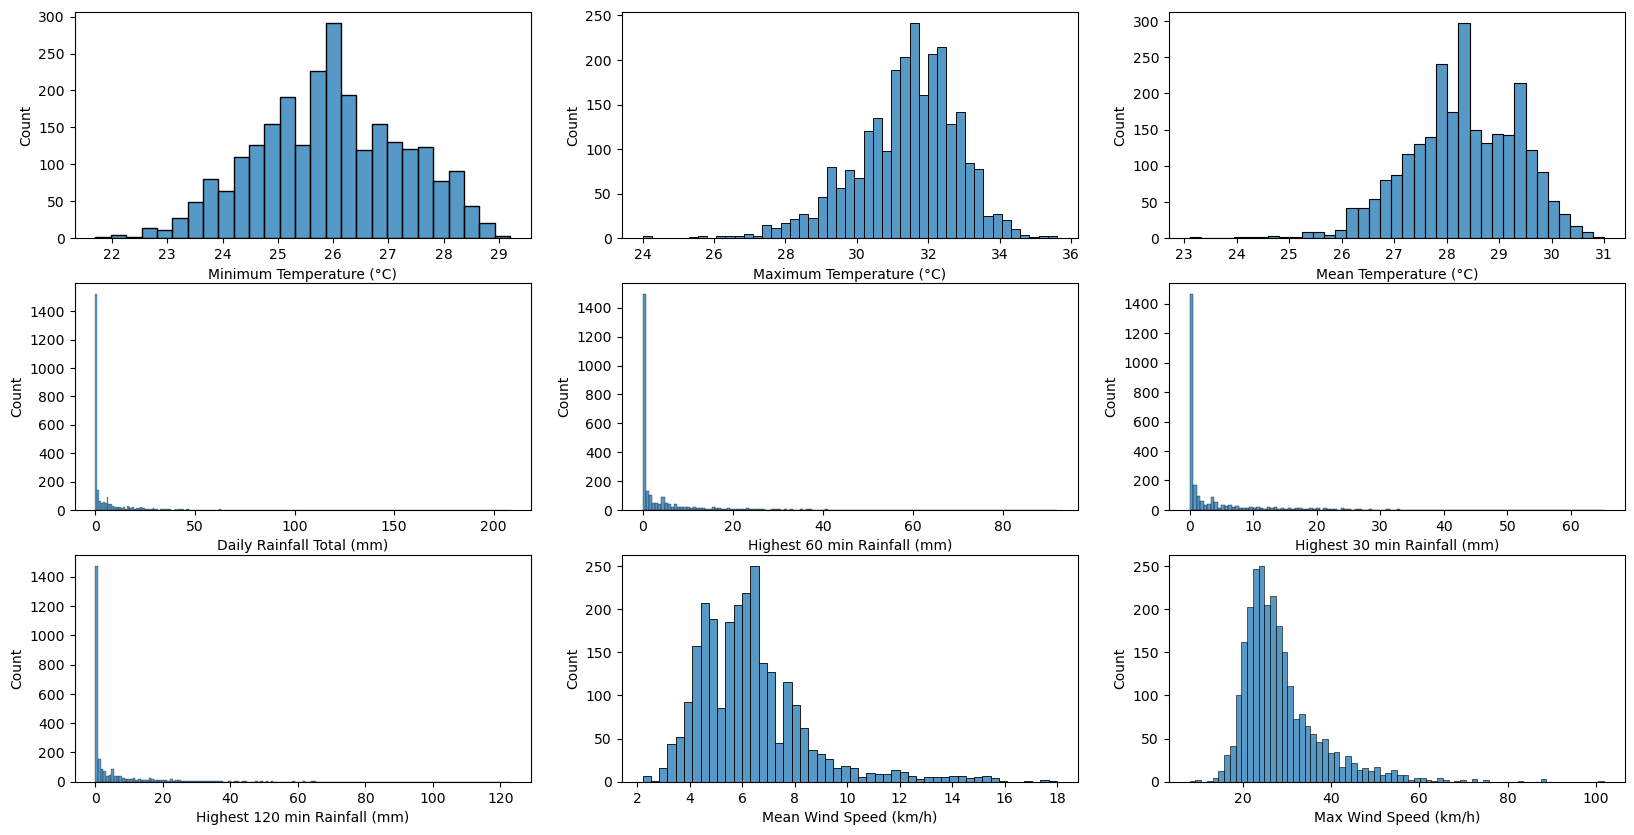

In [56]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.histplot(data = df1, x= 'Minimum Temperature (°C)')
plt.subplot(3,3,2)
sns.histplot(data = df1, x= 'Maximum Temperature (°C)')
plt.subplot(3,3,3)
sns.histplot(data = df1, x= 'Mean Temperature (°C)')
plt.subplot(3,3,4)
sns.histplot(data = df1, x= 'Daily Rainfall Total (mm)')
plt.subplot(3,3,5)
sns.histplot(data = df1, x= 'Highest 60 min Rainfall (mm)')
plt.subplot(3,3,6)
sns.histplot(data = df1, x= 'Highest 30 min Rainfall (mm)')
plt.subplot(3,3,7)
sns.histplot(data = df1, x= 'Highest 120 min Rainfall (mm)')
plt.subplot(3,3,8)
sns.histplot(data = df1, x= 'Mean Wind Speed (km/h)')
plt.subplot(3,3,9)
sns.histplot(data = df1, x= 'Max Wind Speed (km/h)')
plt.show()